# Importing libraries

In [3]:
from tensorflow.keras.layers import Conv2D #convolution layer
from tensorflow.keras.layers import MaxPool2D #max pooling
from keras.layers import Flatten
from tensorflow.keras.layers import Dense #adding layers
from tensorflow.keras.models import Sequential#for initializing


# preprocessing the images

In [4]:
from keras.preprocessing.image import ImageDataGenerator

In [5]:
train_datagen = ImageDataGenerator(rescale=1/255,
                                   width_shift_range=0.10, 
                                   height_shift_range=0.10, 
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip = False,
                                  brightness_range = [0.7, 1.3],)

In [6]:
test_datagen = ImageDataGenerator(rescale = 1/255)

In [7]:
x_train = train_datagen.flow_from_directory(r"C:\Users\DELL\Desktop\IA_project\dataset\train",
                                            target_size=(64,64),
                                            batch_size=32,
                                            class_mode ="categorical",
                                           color_mode = 'rgb')

Found 2205 images belonging to 5 classes.


In [8]:
x_test = test_datagen.flow_from_directory(r"C:\Users\DELL\Desktop\IA_project\dataset\test",
                                          target_size=(64,64),
                                          batch_size=32,
                                          class_mode="categorical")

Found 550 images belonging to 5 classes.


# Building the CNN model

In [9]:
model = Sequential()

In [10]:
model.add(Conv2D(16,(3,3),input_shape=(64,64,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2))) 

In [11]:
model.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2))) 

In [12]:
 model.add(Conv2D(64,(3,3),input_shape=(64,64,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2))) 

In [13]:
model.add(Conv2D(128,(3,3),input_shape=(64,64,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2))) 

In [14]:
model.add(Flatten())

In [15]:
model.add(Dense(units=300,activation="relu"))

In [16]:
model.add(Dense(units=150,activation="relu"))

In [17]:
model.add(Dense(units=5,activation="softmax"))

In [18]:
model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=["accuracy"])


In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 128)         7

In [20]:
x_train.class_indices

{'Acne': 0, 'Melanoma': 1, 'Psoriasis': 2, 'Rosacea': 3, 'Vitiligo': 4}

In [74]:
batch_size = 16

In [49]:
from tensorflow.keras.metrics import Recall
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

In [50]:
early=EarlyStopping(monitor='accuracy',patience=4,mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='accuracy', factor=0.5, patience=2, verbose=1,cooldown=0, mode='auto',min_delta=0.0001, min_lr=0)

In [51]:
history=model.fit(x_train,steps_per_epoch=69,epochs=100,validation_data=x_test,validation_steps=18)


Epoch 1/100
69/69 [==============================] - 15s 220ms/step - loss: 0.2749 - accuracy: 0.9016 - val_loss: 1.5413 - val_accuracy: 0.6545
Epoch 2/100
69/69 [==============================] - 17s 245ms/step - loss: 0.2752 - accuracy: 0.9029 - val_loss: 1.5271 - val_accuracy: 0.6345
Epoch 3/100
69/69 [==============================] - 15s 224ms/step - loss: 0.2616 - accuracy: 0.9066 - val_loss: 1.5305 - val_accuracy: 0.6400
Epoch 4/100
69/69 [==============================] - 15s 219ms/step - loss: 0.2266 - accuracy: 0.9125 - val_loss: 1.5381 - val_accuracy: 0.6527
Epoch 5/100
69/69 [==============================] - 15s 220ms/step - loss: 0.2327 - accuracy: 0.9166 - val_loss: 1.4505 - val_accuracy: 0.6673
Epoch 6/100
69/69 [==============================] - 15s 220ms/step - loss: 0.2477 - accuracy: 0.9061 - val_loss: 1.6386 - val_accuracy: 0.6436
Epoch 7/100
69/69 [==============================] - 15s 222ms/step - loss: 0.2877 - accuracy: 0.8993 - val_loss: 1.5670 - val_accuracy:

In [52]:
model.save("skindisease.h5")


In [53]:
import matplotlib.pyplot as p
import pandas as pd

In [54]:
loss, accuracy = model.evaluate(x_test)

# Print the accuracy
print("Accuracy: " + str(accuracy))
# Print the loss
print("Loss: " + str(loss))


18/18 [==============================] - 2s 93ms/step - loss: 1.8191 - accuracy: 0.6709
Accuracy: 0.6709091067314148
Loss: 1.8191132545471191


Text(0.5, 1.0, 'Training and Validation Accuracy')

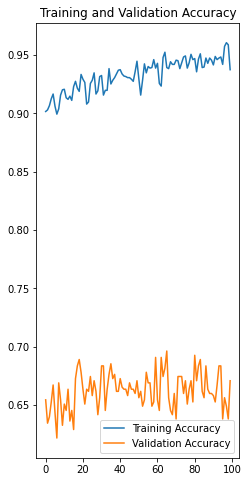

In [55]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

p.figure(figsize=(8, 8))
p.subplot(1, 2, 1)
p.plot( acc, label='Training Accuracy')
p.plot( val_acc, label='Validation Accuracy')
p.legend(loc='lower right')
p.title('Training and Validation Accuracy')